# Alvaro Austin - 2106752180

## Import Libraries

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io, color, filters, util
from skimage.morphology import disk, ball

from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import mark_boundaries, slic
from skimage.util import img_as_float

## Soal 1

### Part A

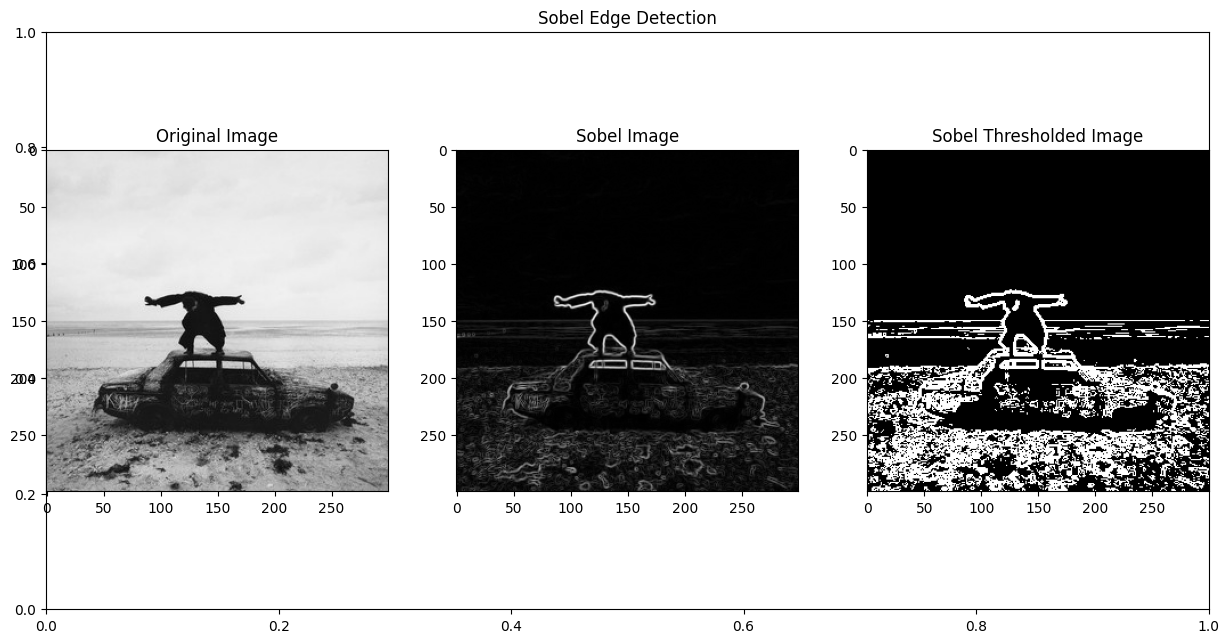

In [24]:
img = io.imread('about_you.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel = util.img_as_ubyte(filters.sobel(gray))

# Anda dapat bereksperimen dengan nilai lower and upper bound lain dari threshold
_, sobel_threshold = cv2.threshold(sobel, 15, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,7.5))
plt.title('Sobel Edge Detection')
plt.subplot(131),plt.imshow(img)
plt.title('Original Image')
plt.subplot(132),plt.imshow(sobel, cmap='gray')
plt.title('Sobel Image')
plt.subplot(133),plt.imshow(sobel_threshold, cmap='gray')
plt.title('Sobel Thresholded Image')
plt.show()

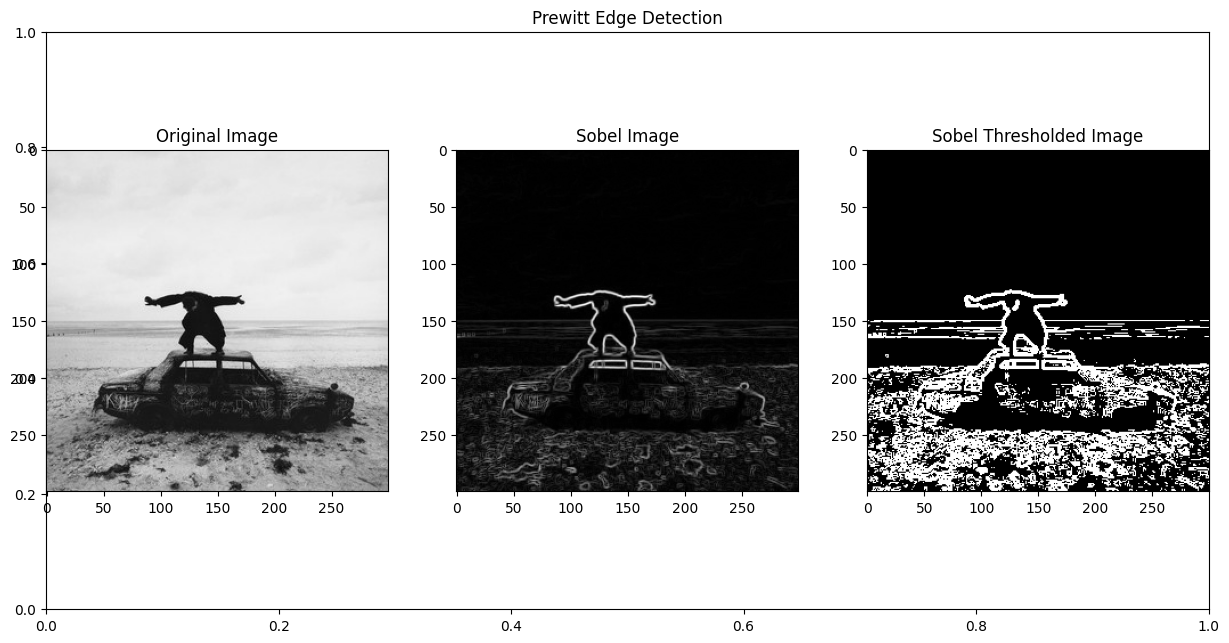

In [25]:
img = io.imread('about_you.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobel = util.img_as_ubyte(filters.prewitt(gray))

# Anda dapat bereksperimen dengan nilai lower and upper bound lain dari threshold
_, sobel_threshold = cv2.threshold(sobel, 15, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(15,7.5))
plt.title('Prewitt Edge Detection')
plt.subplot(131),plt.imshow(img)
plt.title('Original Image')
plt.subplot(132),plt.imshow(sobel, cmap='gray')
plt.title('Sobel Image')
plt.subplot(133),plt.imshow(sobel_threshold, cmap='gray')
plt.title('Sobel Thresholded Image')
plt.show()

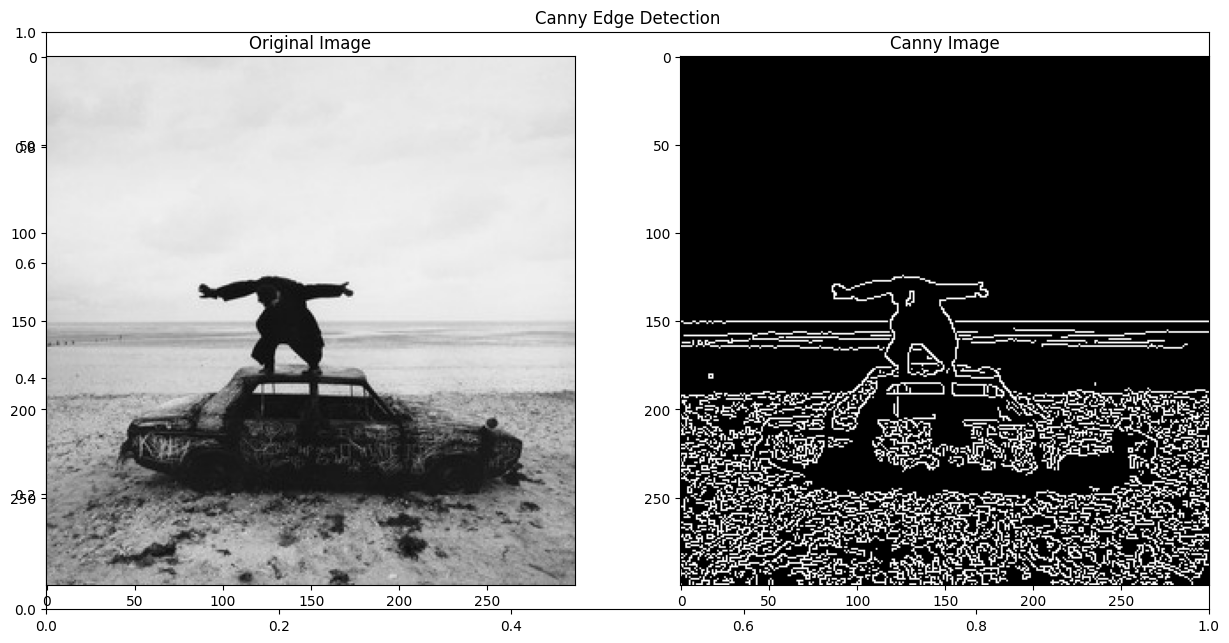

In [26]:
img = io.imread('about_you.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Anda dapat bereksperimen dengan nilai low dan high threshold lainnya, disarankan
# rasio antara low dan high threshold 1:2 atau 1:3.
canny = cv2.Canny(gray, 45, 135)

plt.figure(figsize=(15,7.5))
plt.title('Canny Edge Detection')
plt.subplot(121),plt.imshow(img)
plt.title('Original Image')
plt.subplot(122),plt.imshow(canny, cmap='gray')
plt.title('Canny Image')
plt.show()

### Part B

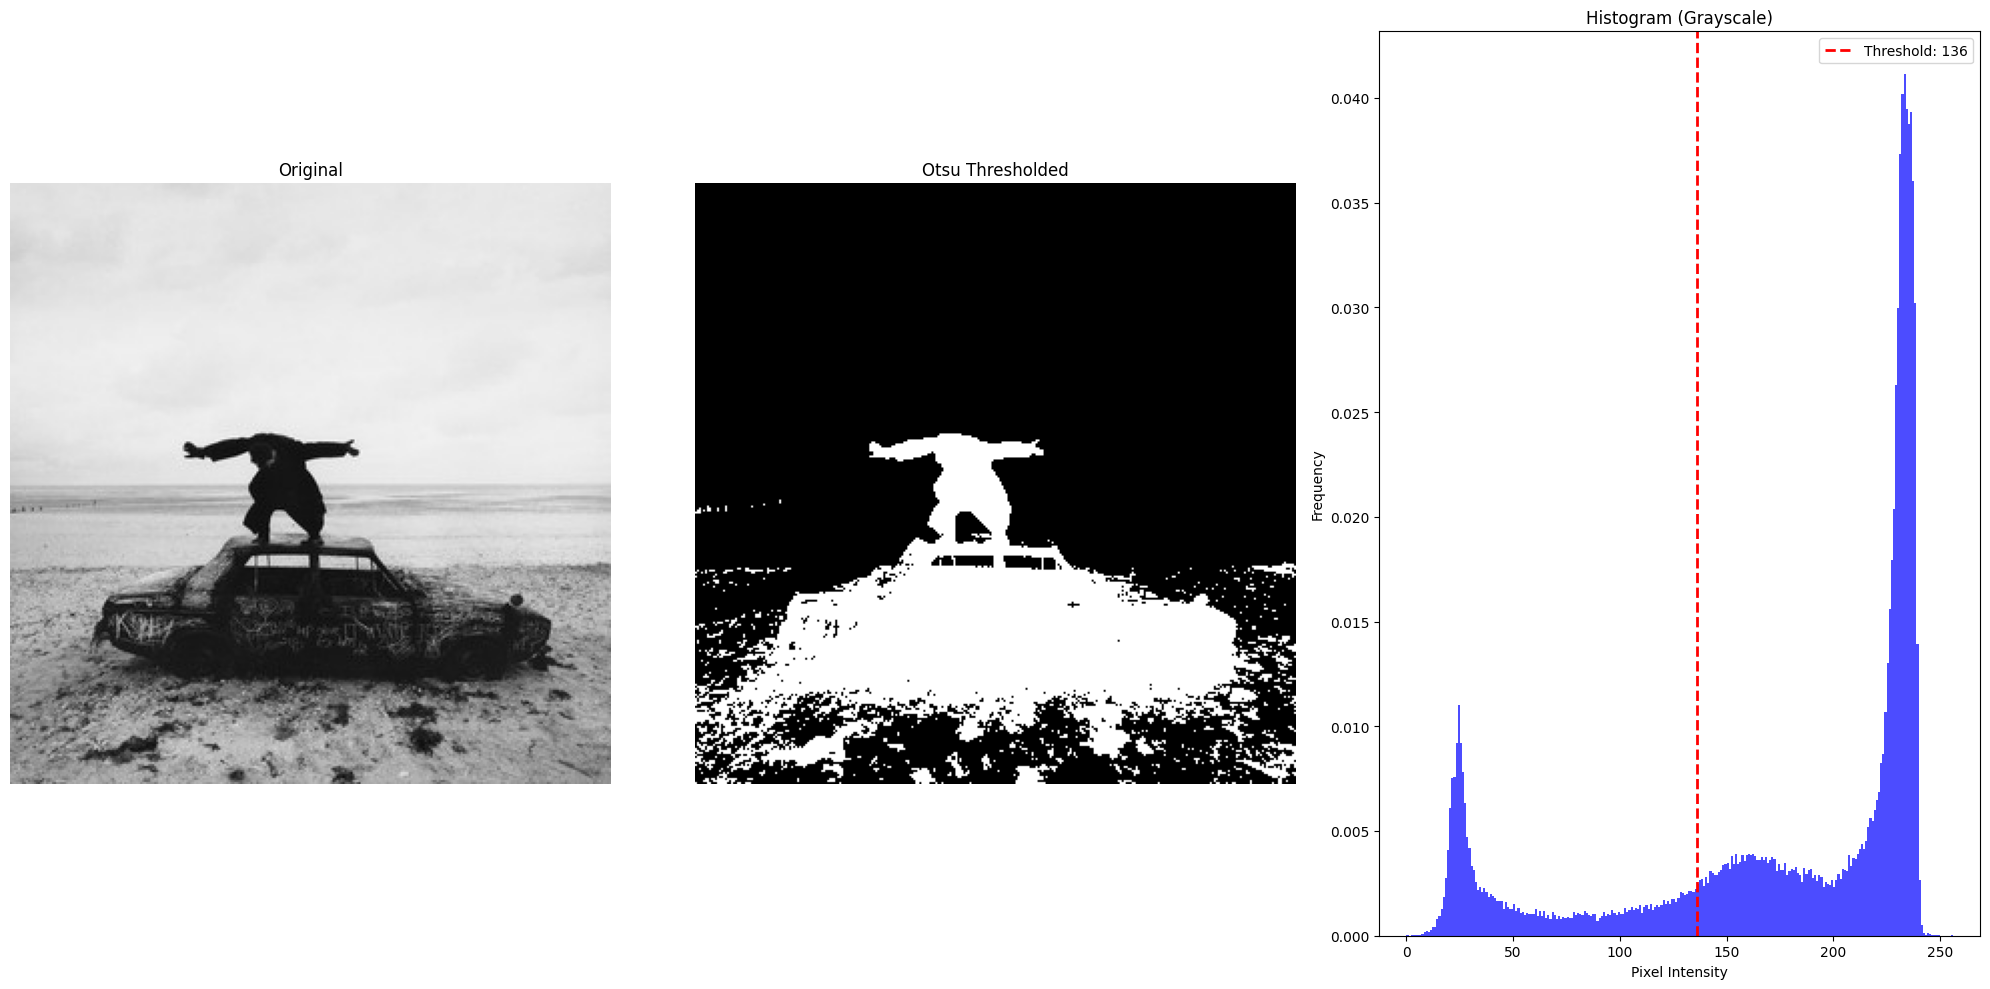

In [27]:
img_thresh = io.imread('about_you.jpeg')
G = util.img_as_ubyte(color.rgb2gray(img_thresh))
T = filters.threshold_otsu(G)
S = util.img_as_float(G > T)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1); plt.imshow(img_thresh)
plt.title('Original'); plt.axis("off")

plt.subplot(1,3,2); plt.imshow(1-S, cmap='gray')
plt.title("Otsu Thresholded"); plt.axis("off")

# Plot histogram
plt.subplot(1,3,3)
plt.hist(G.ravel(), bins=256, range=(0, 256), density=True, color='blue', alpha=0.7)
plt.axvline(T, color='red', linestyle='dashed', linewidth=2, label=f'Threshold: {T}')
plt.title('Histogram (Grayscale)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

Tahapan yang terjadi:
1. Konversi Gambar ke Grayscale: Otsu’s Thresholding hanya berlaku untuk gambar grayscale.
2. Normalisasi: gambar grayscale tersebut kemudian diubah ke tipe data yang sesuai (seperti tipe ubyte atau float), agar lebih mudah diproses, seperti yang terlihat pada penggunaan util.img_as_ubyte() untuk mengonversi nilai piksel menjadi 8-bit.
3. Penentuan Threshold Optimal: Algoritma Otsu's method mencoba mencari nilai ambang (threshold) yang memisahkan gambar ke dalam dua kelas: foreground (objek) dan background.
4. Binerisasi Gambar: setelah threshold optimal ditemukan, gambar diubah menjadi gambar biner. Piksel dengan nilai lebih besar dari threshold dianggap sebagai objek (foreground), sedangkan piksel dengan nilai lebih kecil dianggap sebagai latar belakang (background). 
5. Visualisasi: melakukan visualisasi seperti biasa

### Part C

Basic Edge yang digunakan pada bagian ini adalah Sobel edge detection.

Pada gambar part (a):
- Proses: Sobel edge detection menghitung gradien intensitas pada setiap piksel untuk melakukan edge detection dalam gambar. Hal ini dapat dilakukan karena Sobel cukup sensitif terhadap intensitas warna yang berbeda pada gambar.
- Hasil: Sobel edge detection menghasilkan gambar yang menonjolkan area dengan perubahan intensitas yang tinggi biasanya ini terjadi di edge pada gambar. Hasil yang diperoleh merupakan edge karena terdapat perubahan intensitas yang tajam. Setelah Sobel edge detection, thresholding diterapkan untuk menghasilkan hasil biner

Pada gambar part (b), maksudnya Otsu Treshold:
- Proses: Otsu thresholding secara otomatis menghitung nilai threshold optimal dengan meminimalkan intra-class variance (variansi dalam satu kelas piksel). Metode ini tidak memerlukan deteksi tepi, tetapi bekerja dengan intensitas piksel keseluruhan.
- Hasil: Otsu's thresholding membagi gambar menjadi 2 yaitu background dan foreground. Otsu membagi gambar berdasarkan intensitas global tanpa memperhitungkan gradien lokal, yang berarti bahwa setiap piksel dinilai berdasarkan nilai intensitasnya sendiri dan seluruh distribusi gambar.

Alasan perbedaan yang terjadi:
- Pada treshold, Sobel edge detection menggunakan thresholding manual yang ditetapkan secara eksplisit, sedangkan Otsu menghitung threshold secara otomatis berdasarkan histogram citra.
- Pada teknik mengekstrasi informasi pada gambar, Sobel edge detection mendeteksi perubahan intensitas lokal untuk menemukan tepi, sedangkan Otsu’s thresholding menilai keseluruhan distribusi intensitas piksel untuk membagi gambar. Sobel sensitif terhadap perubahan intensitas yang tajam, sedangkan Otsu lebih fokus pada pembagian piksel berdasarkan nilai global intensitas.

Dengan demikian, Sobel menghasilkan gambar dengan tepi-tepi yang terdeteksi secara lokal, sementara Otsu lebih cocok untuk memisahkan objek secara global dari latar belakang berdasarkan intensitas piksel.

### Part D

Untuk citra ini, Otsu's thresholding tampaknya lebih optimal. Alasannya adalah sebagai berikut:

- Segmentasi objek dari latar belakang lebih penting dalam gambar ini, dan Otsu dapat melakukan hal itu dengan lebih baik daripada Sobel, yang hanya mendeteksi tepi.
- Citra memiliki distribusi intensitas yang cocok untuk Otsu, dengan objek utama (orang dan mobil) yang relatif lebih gelap daripada latar belakang terang, sehingga Otsu dapat menemukan threshold yang memisahkan keduanya secara efektif.
- Sobel berguna untuk menonjolkan tepi, tetapi dalam gambar ini, tujuan utama kemungkinan besar adalah segmentasi keseluruhan objek, bukan hanya tepinya. Sobel juga lebih sensitif terhadap noise kecil dalam gambar.

### Part E

Otsu's thresholding mungkin tidak optimal jika distribusi intensitas dalam gambar tidak bimodal atau jika ada noise yang signifikan di latar belakang. Di sini, Otsu berusaha memisahkan berdasarkan intensitas global, yang dalam beberapa kasus dapat menghasilkan beberapa area kecil yang terganggu oleh noise atau variasi kecil dalam intensitas. Tidak hanya itu, apabila pencahayaan tidak merata (misalnya, objek di satu bagian gambar terang sementara bagian lainnya gelap), Otsu tidak akan bekerja dengan baik. Otsu bekerja pada seluruh gambar dan menetapkan satu threshold global, sehingga tidak bisa mengatasi variasi intensitas di seluruh area gambar.

Contoh kasus setiap kondisi:
- Distribusi yang tidak bimodal: Citra yang terlalu gelap atau terlalu terang di mana sebagian besar piksel berada di area intensitas yang sama, atau citra dengan gradasi intensitas yang halus (seperti bayangan) akan menyebabkan Otsu gagal memisahkan objek dari latar belakang.
- Noise: Gambar dengan noise acak (misalnya, dari sensor kamera yang buruk atau ISO tinggi pada gambar) dapat membuat Otsu memilih threshold yang salah, karena Otsu hanya melihat distribusi global dari intensitas piksel.
- Pencahayaan tidak merata: Jika pencahayaan berbeda di seluruh gambar, Otsu mungkin tidak dapat menemukan threshold yang tepat untuk memisahkan objek dari latar belakang.

Contoh thresholding yang dapat digunakan untuk mengatasi kekurangan adalah adaptive thresholding, di mana threshold dihitung secara lokal berdasarkan area kecil di sekitar setiap piksel. Hal ini memungkinkan threshold beradaptasi dengan variasi intensitas lokal dan noise, sehingga dapat menghasilkan segmentasi yang lebih baik dalam kasus-kasus di atas. Metode ini bekerja dengan menghitung threshold secara lokal untuk setiap bagian kecil dari gambar, bukan global seperti Otsu.

## Soal 2

### Part A

SLIC number of segments: 8


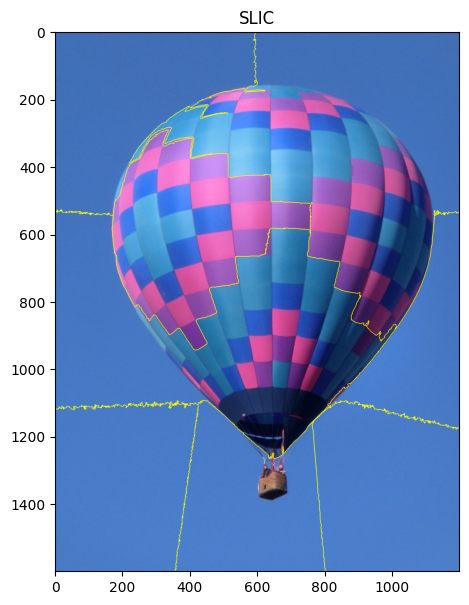

In [28]:
img2 = io.imread('balon_udara.JPG')

segments_slic = slic(img2, n_segments=10)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.figure(figsize=(10,7))
plt.imshow(mark_boundaries(img2, segments_slic))
plt.title('SLIC')
plt.show()



SLIC number of segments: 41


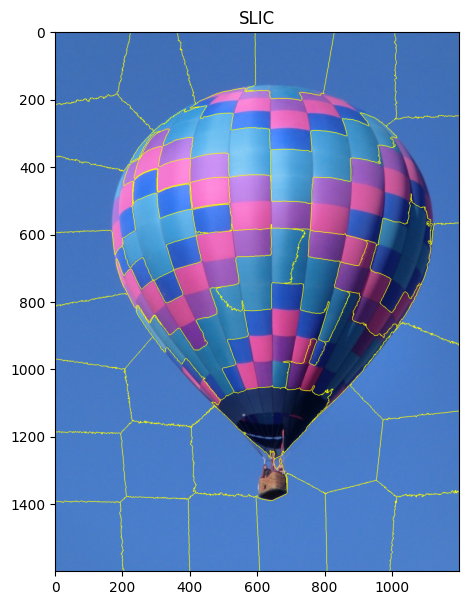

In [29]:
img3 = io.imread('balon_udara.JPG')

segments_slic = slic(img3, n_segments=50)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.figure(figsize=(10,7))
plt.imshow(mark_boundaries(img3, segments_slic))
plt.title('SLIC')
plt.show()



SLIC number of segments: 94


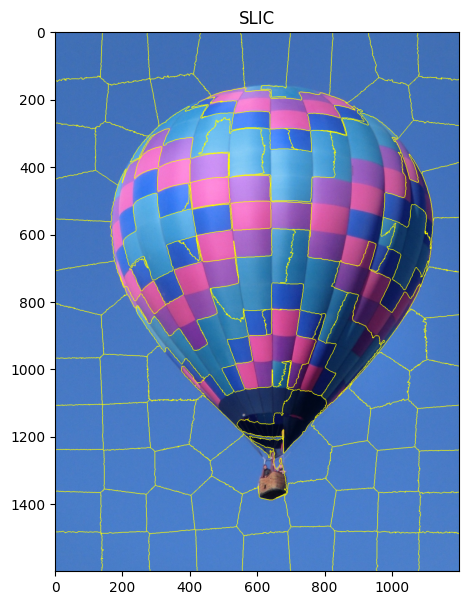

In [30]:
img4 = io.imread('balon_udara.JPG')

segments_slic = slic(img4, n_segments=100)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")

plt.figure(figsize=(10,7))
plt.imshow(mark_boundaries(img4, segments_slic))
plt.title('SLIC')
plt.show()



### Part B

SLIC number of segments (n_segments=10): 8
SLIC number of segments (n_segments=50): 41
SLIC number of segments (n_segments=100): 94


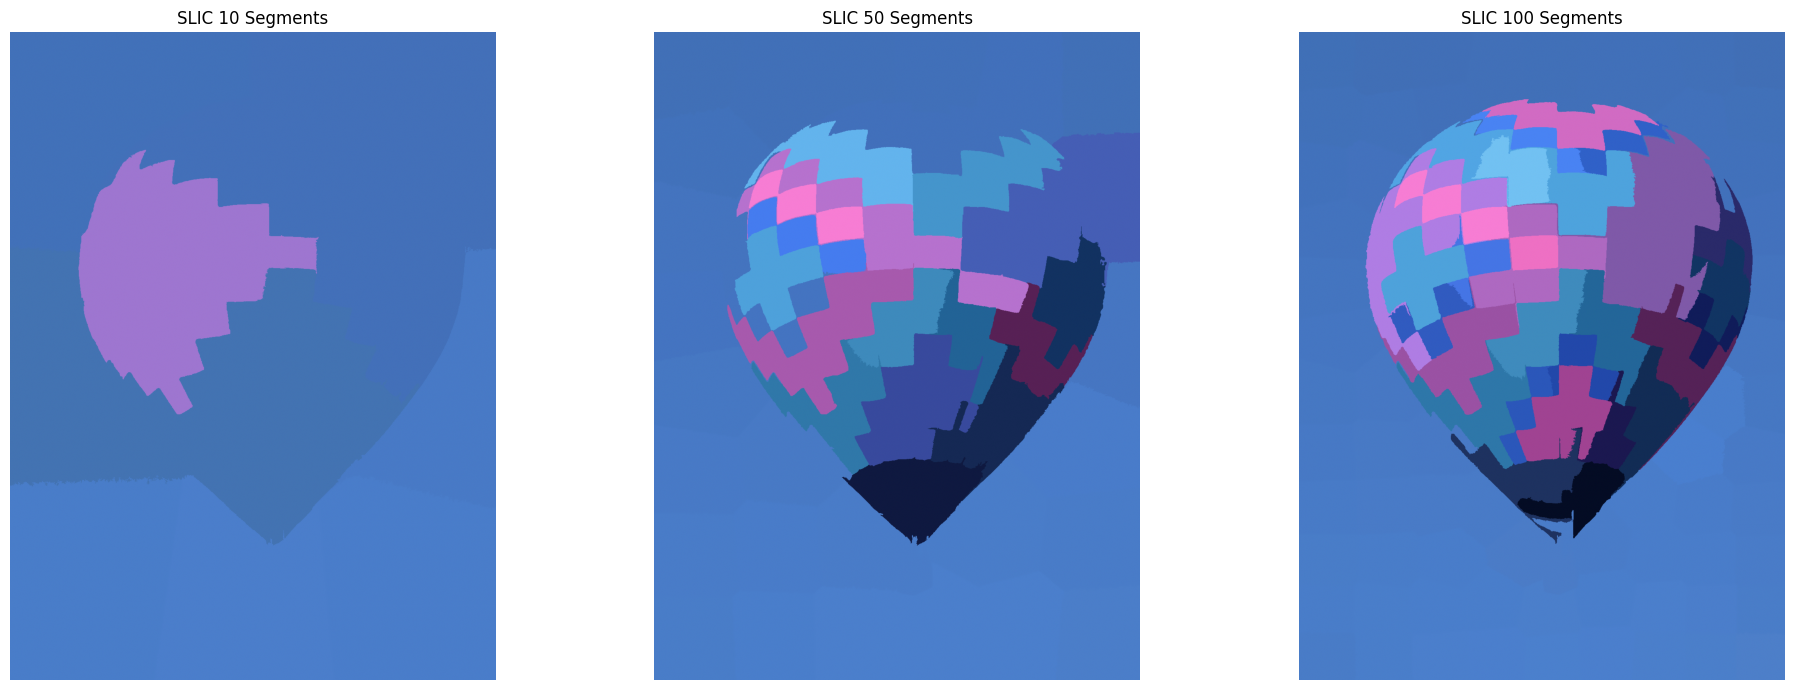

In [31]:
def apply_median_superpixel(image, segments):
    output_image = np.zeros_like(image)
    for segment_val in np.unique(segments):
        mask = (segments == segment_val)
        for channel in range(image.shape[2]):
            median_val = np.median(image[:, :, channel][mask])
            output_image[:, :, channel][mask] = median_val
    return output_image

# Membaca gambar
img = io.imread('balon_udara.JPG')
img = img_as_float(img)

n_segments_list = [10, 50, 100]
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

for i, n_segments in enumerate(n_segments_list):
    segments_slic = slic(img, n_segments=n_segments, start_label=1)
    print(f"SLIC number of segments (n_segments={n_segments}): {len(np.unique(segments_slic))}")
    
    img_median = apply_median_superpixel(img, segments_slic)
    
    axes[i].imshow(img_median)
    axes[i].set_title(f'SLIC {n_segments} Segments')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### Part C

Berdasarkan visualisasi hasil segmentasi yang ditampilkan:

Pengaruh Jumlah Segmen terhadap Hasil Segmentasi:

1. 10 Segmen: Segmentasi ini menghasilkan superpiksel yang sangat besar. Ini berarti setiap superpiksel mencakup area gambar yang luas, sehingga detail pada objek (balon udara) tidak terlalu terlihat. Warna di dalam superpiksel sangat homogen, tetapi struktur balon tidak terwakili dengan baik.

2. 50 Segmen: Dengan 50 segmen, lebih banyak detail yang mulai muncul, terutama pada pola-pola warna balon udara. Ukuran superpiksel menjadi lebih kecil, sehingga pola warna yang berbeda di permukaan balon lebih terlihat. Meskipun demikian, beberapa detail kecil masih tampak kurang jelas.

3. 100 Segmen: Pada segmentasi dengan 100 segmen, setiap detail kecil pada permukaan balon lebih terlihat. Setiap bagian kecil pada balon, terutama pada perbedaan warna, disegmentasi lebih jelas. Ini memberikan representasi yang lebih mendetail dari balon udara, dengan superpiksel yang lebih kecil dan lebih akurat dalam menangkap detail.

**Jumlah Segmen Terbaik**

Berdasarkan visualisasi, segmentasi dengan 100 segmen memberikan hasil terbaik untuk gambar ini. Detail pola balon udara menjadi lebih jelas dan tampak terwakili lebih baik. Segmentasi dengan jumlah segmen yang lebih sedikit (10 dan 50) cenderung terlalu kasar dan tidak menangkap detail gambar dengan baik. Segmentasi dengan 100 segmen memberikan keseimbangan antara ukuran superpiksel dan ketepatan dalam menangkap detail objek di dalam gambar.